In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
 
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

C:\Users\Pranav\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

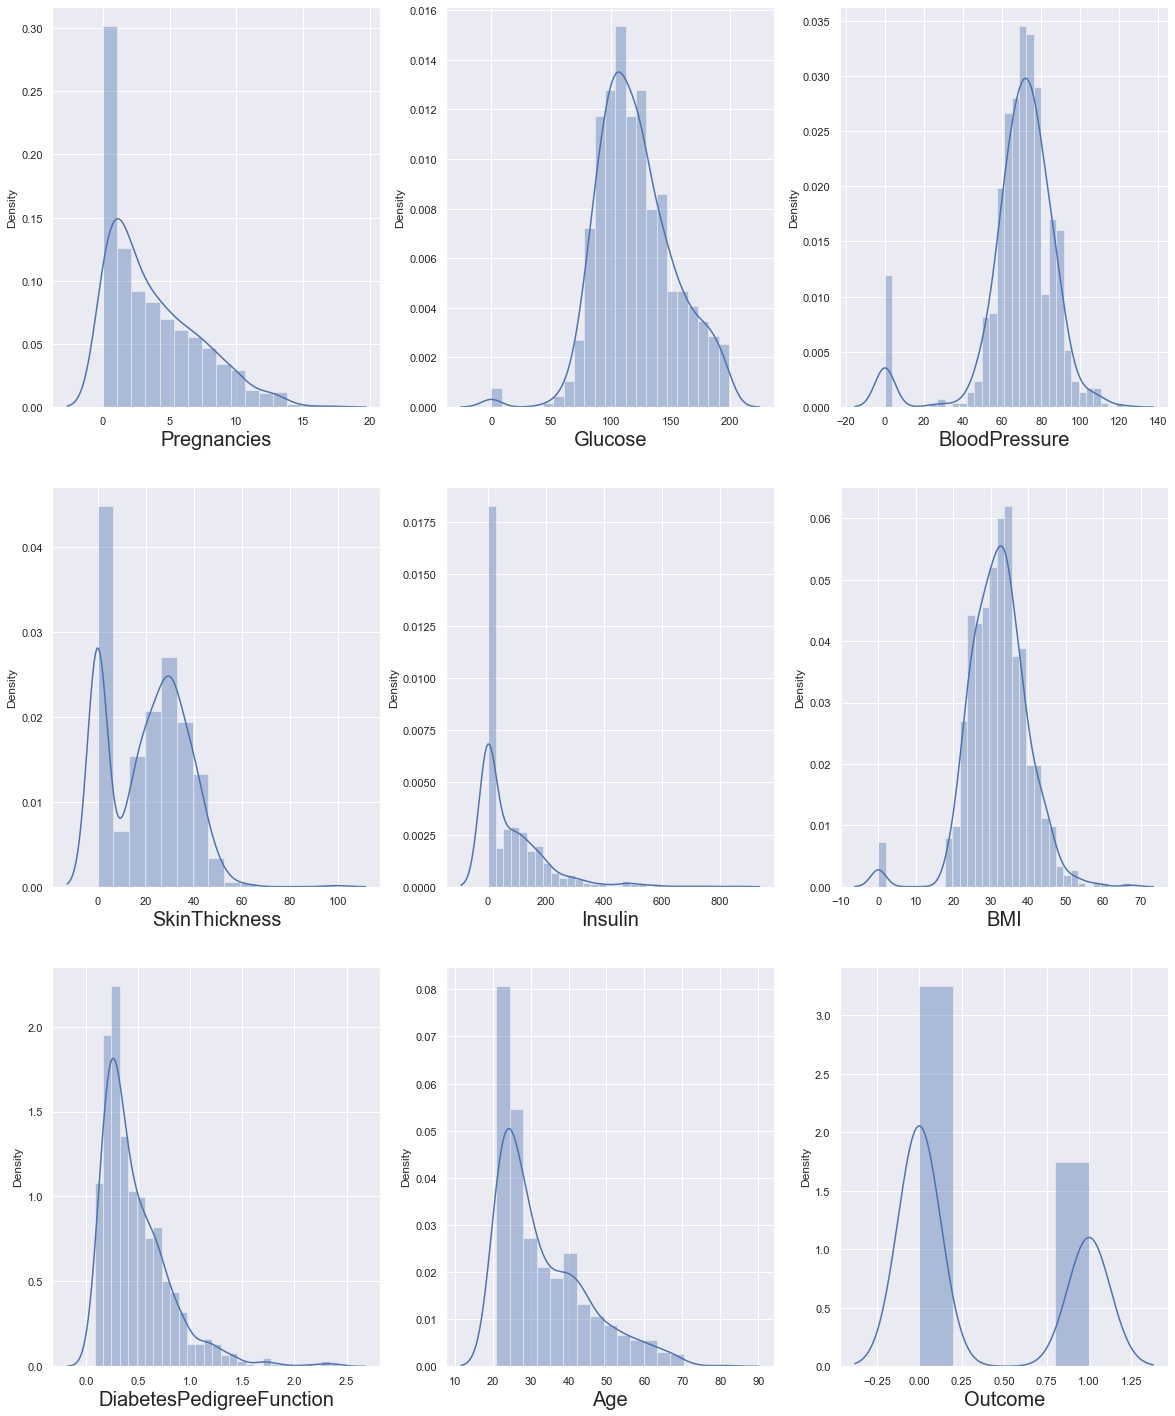

In [3]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [4]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [5]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [6]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [8]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn.predict(x_test)

In [10]:
knn.score(x_train,y_train)

0.8420138888888888

In [11]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.6979166666666666


In [12]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [13]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [17]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.724 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.774 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.765 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.722 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.767 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.739 total 

[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.757 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.767 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.765 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.757 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.757 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10;, score=0.759 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n

[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.759 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.791 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.765 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.767 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.826 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.783 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.757 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.748 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=13;, score=0.757 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=13;, score=0.783 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=13;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=3;, score=0.724 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=3;, score=0.774 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=3;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=3;, score=0.765 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=3;, score=0.722 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=5;, score=0.767 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=5;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=5;,

[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=5;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.767 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.757 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.767 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.765 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.

[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.757 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.757 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.759 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.791 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.765 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11;, score=0.767 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11;, score=0.826 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11;, score=0.783 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11;,

[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=11;, score=0.783 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=11;, score=0.757 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=11;, score=0.748 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.759 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.817 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.774 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.757 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=13;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=13;, score=0.826 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=13

[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.724 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.774 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.765 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.722 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.767 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.730 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.739 total time=   0.0

[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=9;, score=0.767 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=9;, score=0.765 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=9;, score=0.757 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=9;, score=0.757 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=0.759 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=0.791 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=0.765 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=0.774 total time=   

[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.739 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.767 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.826 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.783 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.757 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.748 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=12;, score=0.759 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=12;, score=0.817 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=12;, score=0.774 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=12;, score=0.757 total t

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [18]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [14]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn_1 = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [15]:
knn_1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [16]:
knn_1.score(x_train,y_train)

0.8194444444444444

In [17]:
knn_1.score(x_test,y_test)

0.7239583333333334

In [20]:
y_pred=knn.predict(x_test)

In [22]:
confusion_matrix(y_test,y_pred)

array([[92, 26],
       [32, 42]], dtype=int64)

In [23]:
true_negative, false_positive, false_negative, true_positive =  confusion_matrix(y_test,y_pred).ravel()

In [24]:
accuracy = (true_positive + true_negative)/ (true_negative + false_positive + false_negative + true_positive  )

In [25]:
accuracy

0.6979166666666666

In [26]:
recall = true_positive / (true_positive + false_negative)

In [27]:
recall

0.5675675675675675

In [28]:
precision = true_positive / (true_positive + false_positive)

In [29]:
precision

0.6176470588235294

In [30]:
f1= 2 * (recall * precision) / (recall + precision)

In [31]:
f1

0.5915492957746479

In [32]:
specificity = true_negative / (true_negative + false_positive)

In [33]:
specificity

0.7796610169491526